<a href="https://colab.research.google.com/github/EmelyanovAndreyNSK/PythonTasks/blob/master/%D1%81%D0%BC%D0%B2%D0%BC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Провести:**
P<sub>n</sub>(x), 

x<sub>k</sub> = 1 + k/n, 

y<sub>k</sub> = y(x), 

k = 0, ..., n

**Графики:**

1) P<sub>n</sub>(x) - y(x)

2) max |P<sub>n</sub>(x) - y(x)| для любого n

3) **N + sin(x)**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [ ]:
#таблица абсцисс и ординат
def f(x):
    return math.cos(x)
  
n = 10
k = np.arange(n)
x = np.zeros(n)
y = np.zeros(n)
for i in k:
  x[i] = 1+i/n
  y[i] = f(x[i])
table = pd.DataFrame(data={'k': k, 'x': x, 'y': y})
table

,k,x,y
0,0,1.0,0.540302
1,1,1.1,0.453596
2,2,1.2,0.362358
3,3,1.3,0.267499
4,4,1.4,0.169967
5,5,1.5,0.070737
6,6,1.6,-0.029200
7,7,1.7,-0.128844
8,8,1.8,-0.227202
9,9,1.9,-0.323290


In [ ]:
def coef(x, y):
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])
    return np.array(a) # массив с коэффициентами

#x = [0, 1, 4, 5, 7]
#y = [-1, 1, 1, 6, 5]# значения, которые легко проверить
table = pd.DataFrame(data={'coefficients': coef(x, y)})
table

,coefficients
0,0.540302
1,-0.867062
2,-0.226609
3,0.151937
4,0.015073
5,-0.007892
6,-0.000371
7,0.000193
8,0.000004
9,-0.000003


[1.0000022819627215, 0.9950052093848878, 0.980067025401931, 0.95533666657926, 0.921061057967697, 0.8775825823466092, 0.8253356205056648, 0.764842188518189, 0.6967067095431234, 0.6216099682875972] - интерполированые значения


<function matplotlib.pyplot.show>

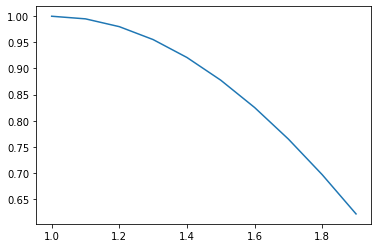

In [ ]:
def newton_polynomial(x, y, x0):# x0 - точка для интерполяции
    a = coef(x, y)
    n = len(x) - 1 #степень полинома
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x0 - x[n - k])*p
    return p
  
#print(newton_polynomial(x, y, 3)) # - печатает интерполированное значение в точке x0

N = []
to_interpolate = np.arange(0, 1, 0.1)
for i in to_interpolate:
    N.append(newton_polynomial(x, y, i))
print(N, '- интерполированые значения')
plt.plot(x, N)
plt.show

<function matplotlib.pyplot.show>

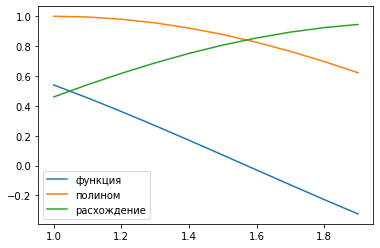

In [ ]:
#1
P = np.zeros(len(x))
for i in range (len(P)):
    P[i] = N[i]- y[i]
plt.plot(x, y, label = 'функция')
plt.plot(x, N, label = 'полином')
plt.plot(x, P, label = 'расхождение')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

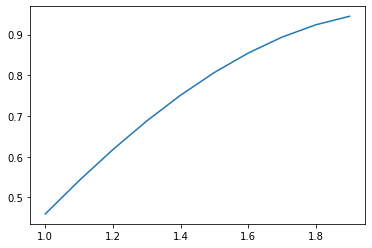

In [ ]:
#2
P = np.zeros(len(x))
for i in range (len(P)):
    P[i] = N[i]- y[i]
plt.plot(x, abs(P))
plt.show

<function matplotlib.pyplot.show>

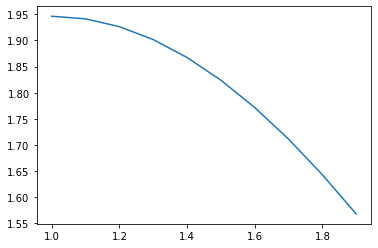

In [ ]:
#3
def fun(x):
  return math.sin(x)

y_sin = np.zeros(len(x))
P = np.zeros(len(x))
for i in x:
  for j in range(len(x)):
    y_sin[j] = fun(i)
for k in range(len(P)):
    P[k] = N[k] + y_sin[k]
plt.plot(x, P)
plt.show